In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data import *
from preprocess import *
from skimage.color import rgb2gray

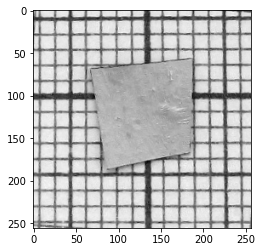

In [6]:
img, filename = next(random_images(names=True))
img = align(rgb2gray(img))
plt.imshow(img, cmap='gray')

$\forall x \in [0, a + b]$
$$
f = \left\{\begin{matrix}
    0, x < a\\
    1, x \ge a
\end{matrix}\right.
$$

In [21]:
import sympy as sp
from sympy.abc import x, a, b
from sympy.utilities.lambdify import lambdify

In [46]:
F = sp.fourier_series(sp.Piecewise((1, x < a), (0, x >= a)), (x, 0, a + b))

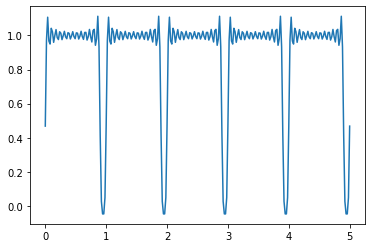

In [104]:
f = lambdify((x, a, b), F.truncate(15), 'numpy')
a_val = 0.9
b_val = 0.1
t = np.linspace(0, (a_val + b_val)*5, 256)
plt.plot(t, f(t, a_val, b_val))

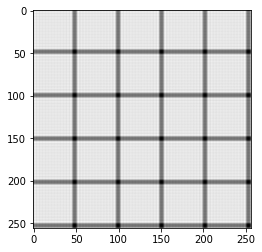

In [105]:
X, Y = np.meshgrid(t, t)
Z = f(X, a_val, b_val) + f(Y, a_val, b_val)
plt.imshow(Z, cmap='gray')

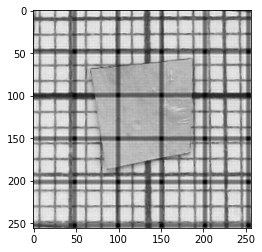

In [106]:
plt.imshow(img*Z, cmap='gray')

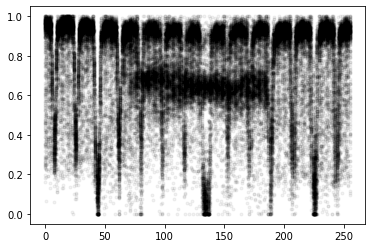

In [107]:
Y = np.apply_along_axis(lambda x: (x - x.min())/(x.max() - x.min()), 1, img).flatten()
X = np.concatenate([np.arange(0, img.shape[0])]*img.shape[1])
plt.plot(X, Y, 'k.', alpha=0.05)
plt.show()

In [80]:
from scipy.optimize import curve_fit

In [121]:
ff = lambda x, a, b, c: f(x - b, a, 0.01) + c
popt, pcov = curve_fit(ff, X, Y, p0=[1/0.07, 0, 0])

In [122]:
popt

array([14.16883194,  1.38611879, -0.27846729])

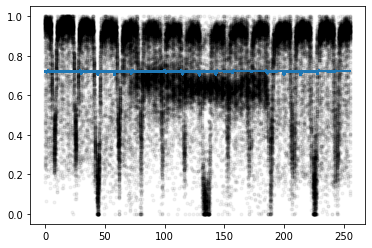

In [123]:
plt.plot(X, Y, 'k.', alpha=0.05)
plt.plot(X, ff(X, *popt))